## 1. EDA

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('..\IT496_Data_Voyagers_Project1\EVChargingStationUsage.csv')
df.dropna()
df.head()

C:\Users\DR2018TU\AppData\Local\Temp\ipykernel_12964\2222622696.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\IT496_Data_Voyagers_Project1\EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number', 'Total Duration (seconds)',
       'Charging Time (seconds)', 'Start Time', 'End Time'],
      dtype='object')

In [ ]:
df.shape

(259415, 35)

In [ ]:
df.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N,Total Duration (seconds),Charging Time (seconds)
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05,259415.000000,259415.000000
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11,8952.554960,7196.845121
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10,7965.581056,4977.301971
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11,60.000000,6.000000
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11,4215.000000,3744.000000
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11,7521.000000,6539.000000
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11,11124.000000,9710.000000
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11,412341.000000,82555.000000


In [ ]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                              40
End Time Zone                          0
Transaction Date (Pacific Time)      209
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency                            1788
Fee                                    0
Ended By        

In [ ]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])
df['Total Duration (seconds)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Total Duration (hh:mm:ss)'], inplace=True)

In [ ]:
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])
df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Charging Time (hh:mm:ss)'], inplace=True)

Include all graph from dataset

**Boxplot**

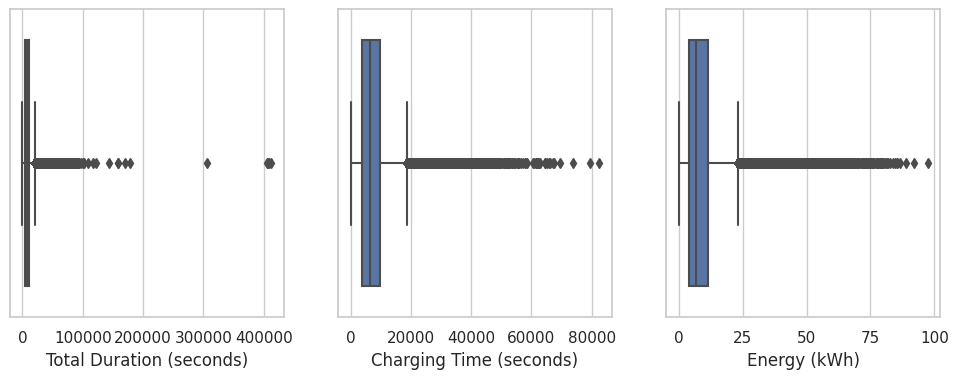

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total Duration (seconds)", "Charging Time (seconds)", "Energy (kWh)"]):
    sns.boxplot(x=df[col], ax=ax[axid])

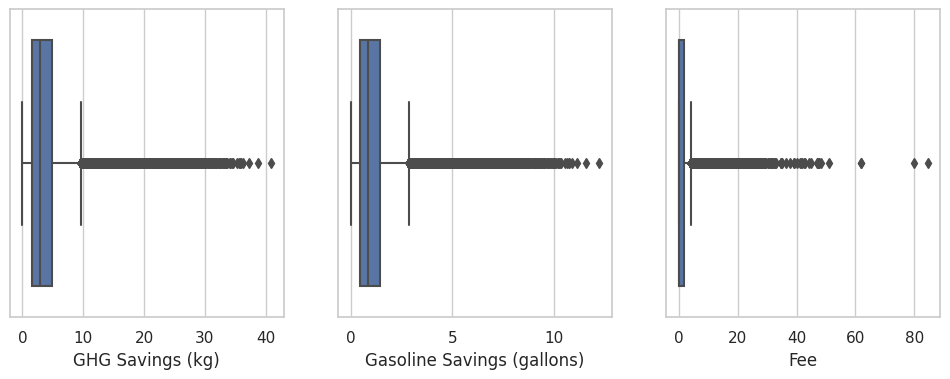

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["GHG Savings (kg)", "Gasoline Savings (gallons)", "Fee"]):
    sns.boxplot(x=df[col], ax=ax[axid])

**Pie charts**

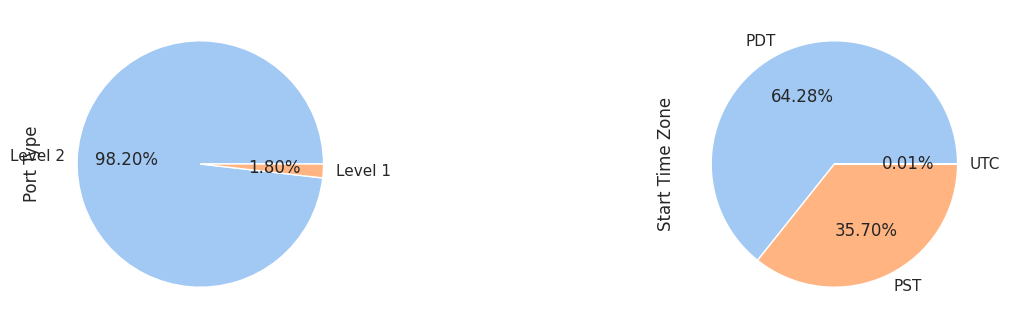

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

for axid, col in enumerate(["Port Type","Start Time Zone"]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

**Count plot**

<Axes: xlabel='Station Name', ylabel='count'>

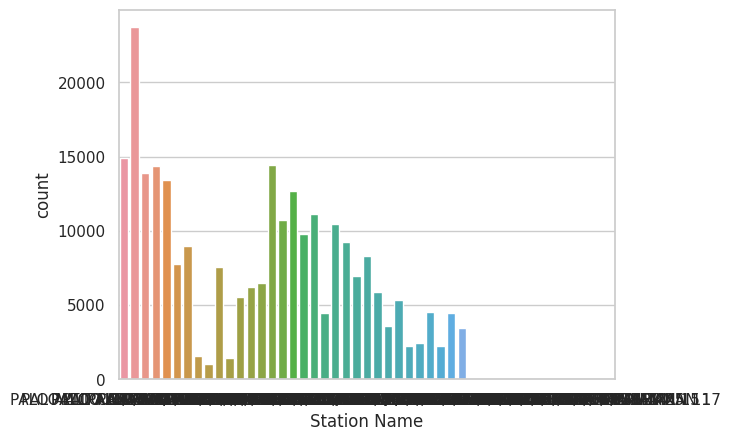

In [ ]:
sns.countplot(x="Station Name",data=df)

<Axes: xlabel='Fees', ylabel='count'>

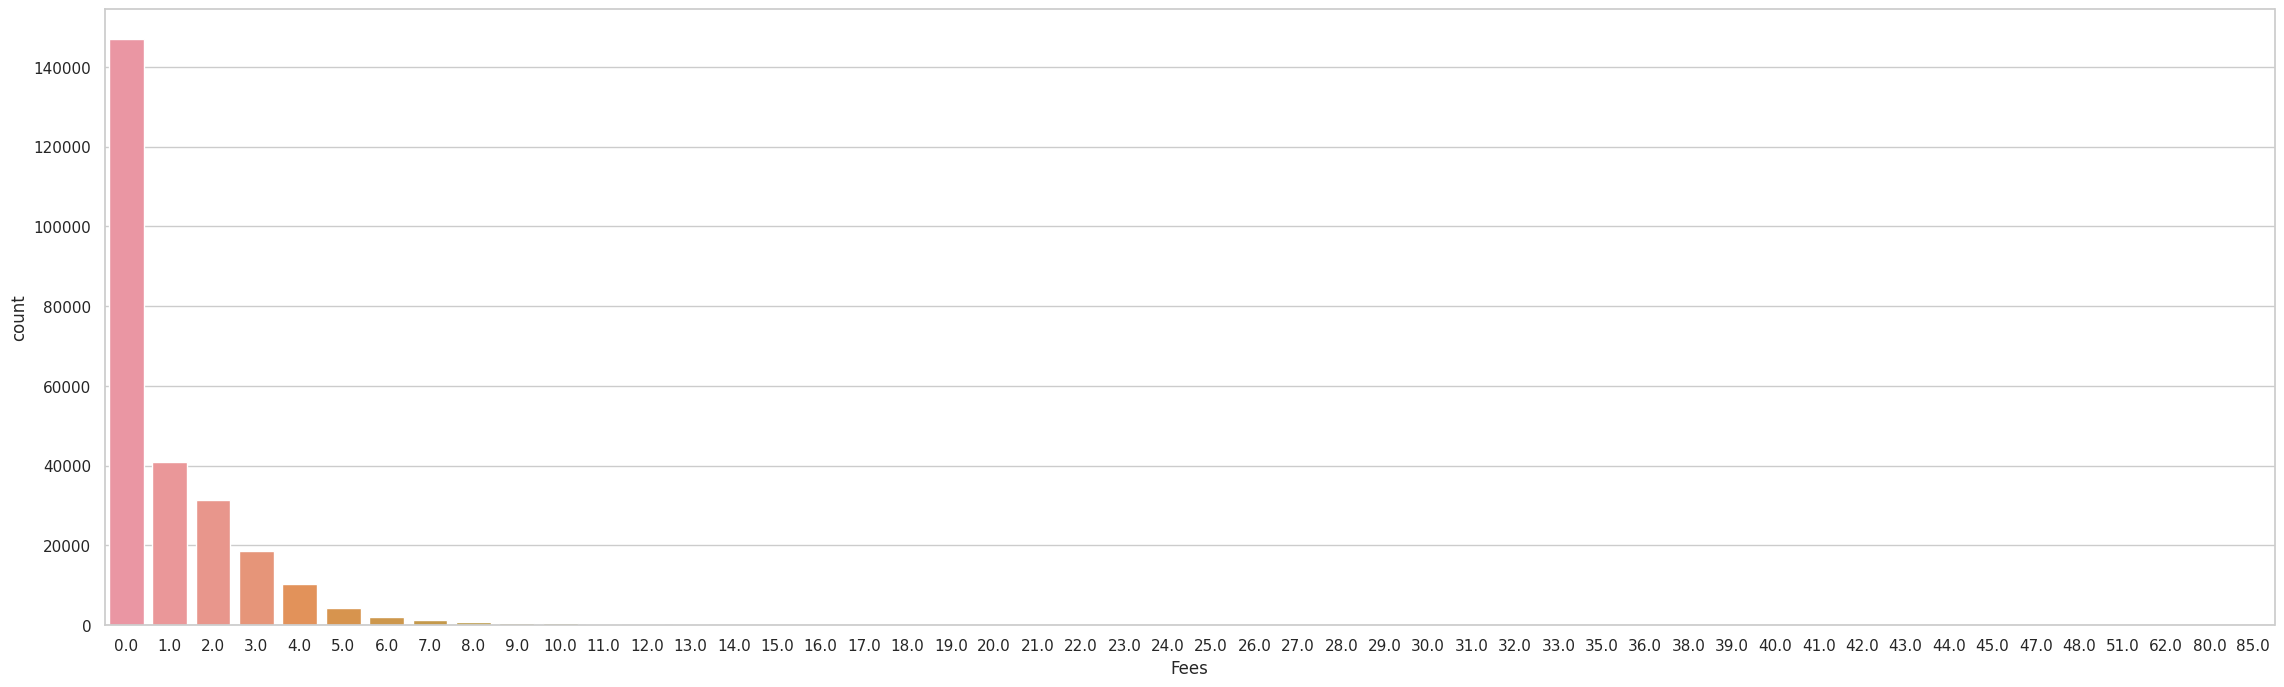

In [ ]:
df["Fees"]=df["Fee"].round()
plt.figure(figsize=(28, 8))
sns.countplot(x="Fees",data=df)

<Axes: xlabel='Plug Type', ylabel='count'>

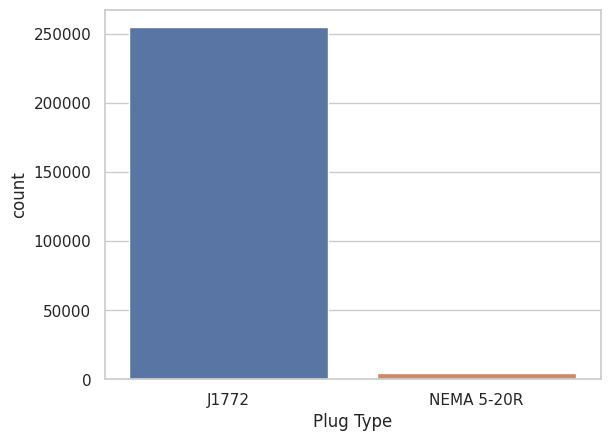

In [ ]:
sns.countplot(x="Plug Type",data=df)

**Scatterplot**

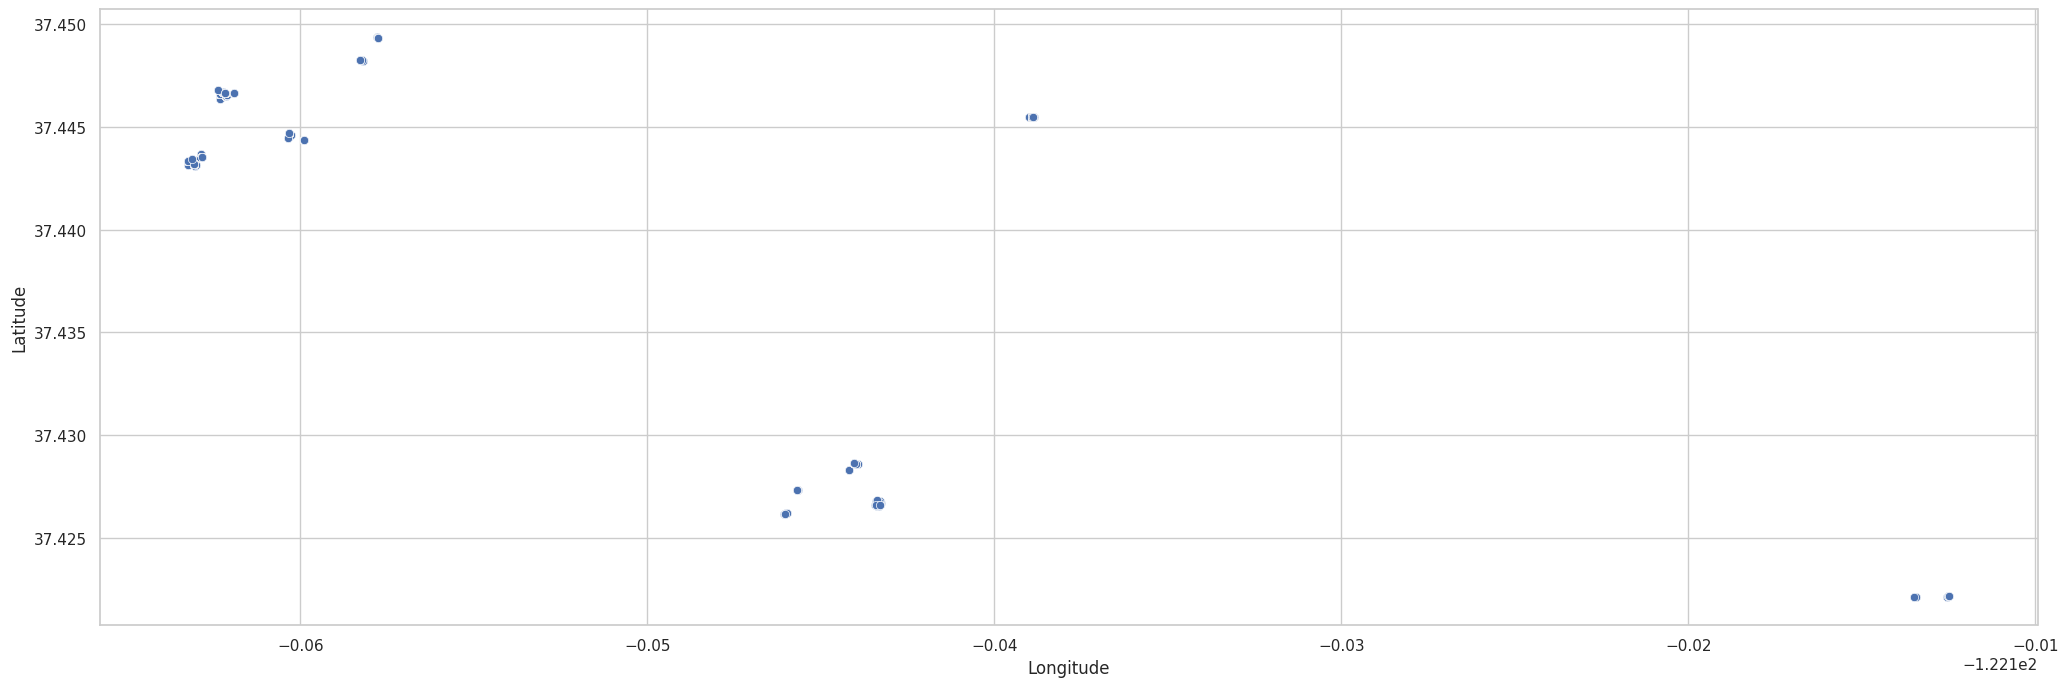

In [ ]:
plt.figure(figsize=(25,8))
ax = sns.scatterplot(x=df["Longitude"], y=df["Latitude"], sizes=(20, 200), legend="full")

<ipython-input-52-53e51a9af223>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), lw = 1)


<Axes: >

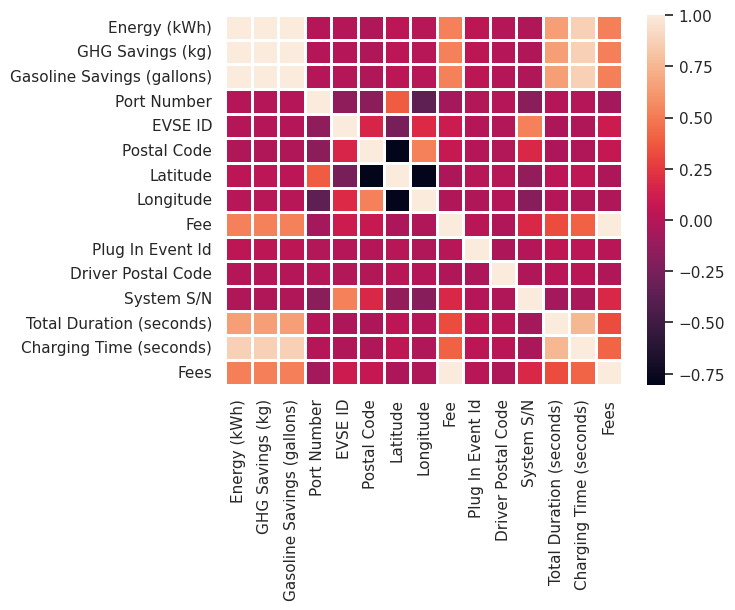

In [ ]:
sns.heatmap(data=df.corr(), lw = 1)

<ipython-input-53-f57ef0b5a1b7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['Latitude', 'Longitude']).sum().reset_index()


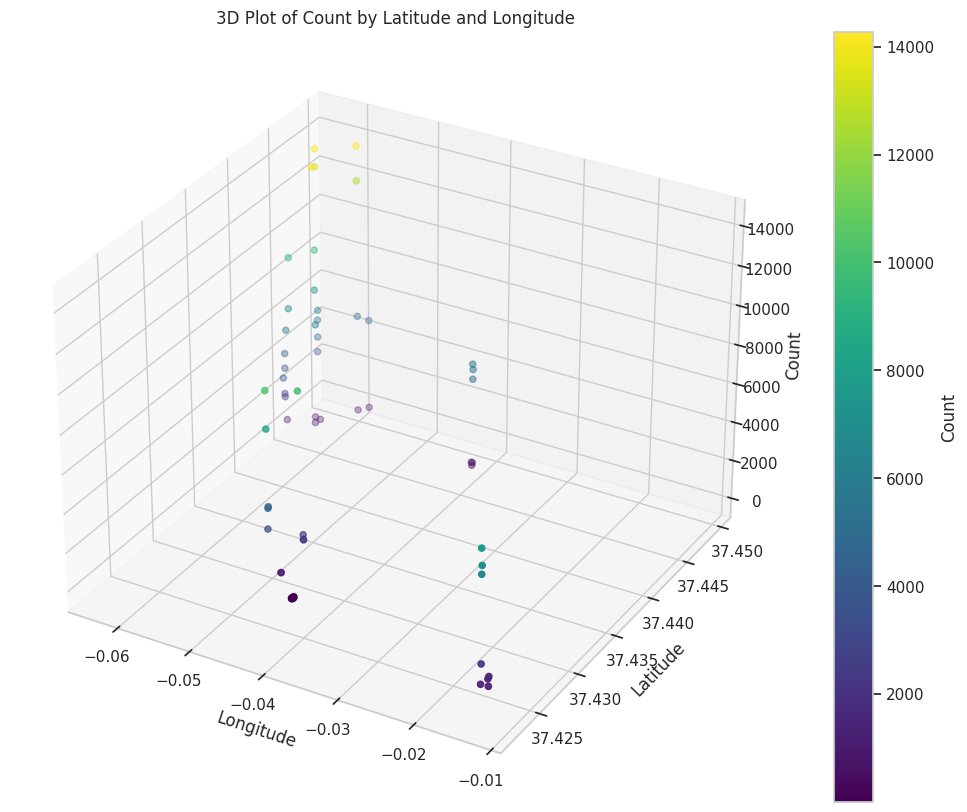

In [ ]:
# Create a new column with constant value 1 (to represent the count)
df['Count'] = 1

# Group data by Latitude and Longitude and sum the counts
grouped = df.groupby(['Latitude', 'Longitude']).sum().reset_index()

# Set up the figure and 3D axis
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(grouped['Longitude'], grouped['Latitude'], grouped['Count'], c=grouped['Count'], cmap='viridis')

# Customize the plot labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Count')
plt.title('3D Plot of Count by Latitude and Longitude')

# Add a colorbar to indicate count
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Show the plot
plt.show()

In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['Start Time'] = df['Start Date'].dt.strftime('%H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M',errors='coerce')
df['End Time'] = df['End Date'].dt.strftime('%H:%M')

In [ ]:
df['Start Time'] = df['Start Time'].astype(str)
df['End Time'] = df['End Time'].astype(str)

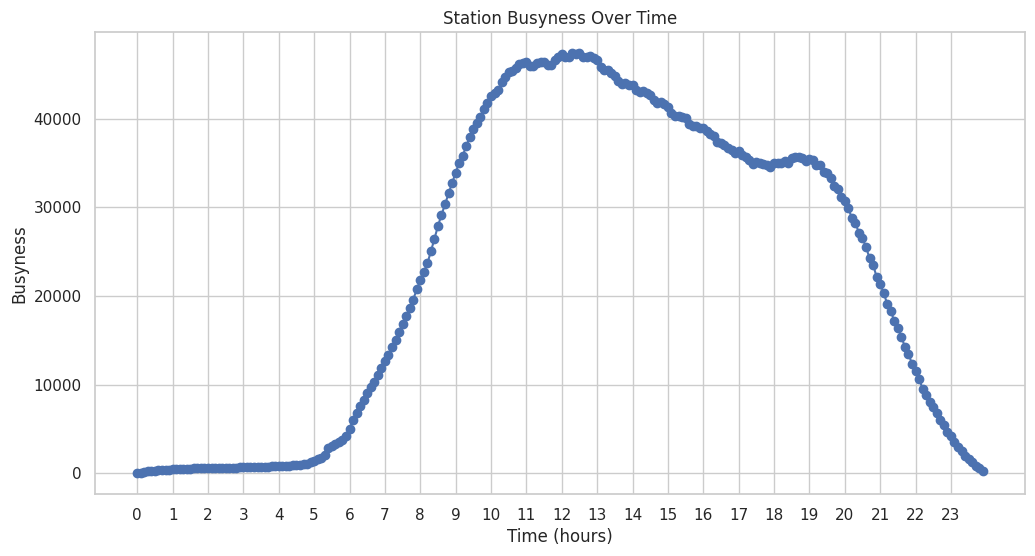

In [ ]:
# Define a function to convert time strings to hours
def time_to_hours(time_str):
    if pd.notna(time_str) and ':' in time_str:
        hours, minutes = map(int, time_str.split(':'))
        return hours + minutes / 60
    else:
        return np.nan  # Handle missing or invalid values

# Apply the time_to_hours function with error handling
df['Start Hour'] = df['Start Time'].apply(time_to_hours)
df['End Hour'] = df['End Time'].apply(time_to_hours)

# Create an array representing the 24-hour timeline
timeline = np.arange(0, 24, 0.1)  # Adjust the step size as needed

# Calculate busyness for each time point on the timeline
busyness = []
for hour in timeline:
    active_uses = ((df['Start Hour'] <= hour) & (df['End Hour'] >= hour)).sum()
    busyness.append(active_uses)

# Create the plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(timeline, busyness, marker='o', linestyle='-', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Busyness')
plt.title('Station Busyness Over Time')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))  # Adjust the x-axis ticks as needed
plt.show()

Charging Duration Prediction

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing
df=df.dropna()

In [ ]:
# Split the 'Start Time' strings into hours and minutes
df['Hours'], df['Minutes'] = df['Start Time'].str.split(':').str

# Convert hours and minutes columns to integers
df['Hours'] = df['Hours'].astype(int)
df['Minutes'] = df['Minutes'].astype(int)

# Calculate total minutes
df['Start Time(Minutes)'] = df['Hours'] * 60 + df['Minutes']

# Drop the intermediate 'Hours' and 'Minutes' columns if needed
df = df.drop(['Hours', 'Minutes'], axis=1)

<ipython-input-108-d1abaf282cd6>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Hours'], df['Minutes'] = df['Start Time'].str.split(':').str


In [ ]:
mapping = {'Level 1': 1, 'Level 2': 2}

# Use the map function to replace values
df['Port Type'] = df['Port Type'].map(mapping)

In [ ]:
df[[ 'Port Type']]

,Port Type
78948,2
78949,2
78950,2
78951,2
78952,2
...,...
259409,2
259411,2
259412,2
259413,2


In [ ]:
data_df = df[["Longitude","Latitude","Start Time(Minutes)","Port Type"]]
data_df =data_df.dropna()
data_df.head()

,Longitude,Latitude,Start Time(Minutes),Port Type
78948,-122.146065,37.426155,321,2
78949,-122.146065,37.426182,361,2
78950,-122.146065,37.426155,363,2
78951,-122.159904,37.444359,370,2
78952,-122.162849,37.443558,373,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Total Duration (seconds)"], random_state=42, test_size=0.20)

In [ ]:
X_train

,Longitude,Latitude,Start Time(Minutes),Port Type
151484,-122.158234,37.448273,1266,2
114636,-122.162880,37.443676,938,2
179969,-122.162231,37.446690,1066,2
196171,-122.158234,37.448273,645,2
166165,-122.160324,37.444706,425,2
...,...,...,...,...
205477,-122.162109,37.446583,939,2
187945,-122.160324,37.444706,508,2
218474,-122.158272,37.448284,555,2
234754,-122.145981,37.426228,848,2


In [ ]:
y_train

151484     2951.0
114636     9797.0
179969     3065.0
196171     6650.0
166165    10323.0
           ...   
205477    17453.0
187945     7455.0
218474    23355.0
234754     3290.0
207704     7504.0
Name: Total Duration (seconds), Length: 135526, dtype: float64

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((135526, 4), (33882, 4))

In [ ]:
X_train_scaled

array([[-0.5005397 ,  0.95582653,  1.7995047 ,  0.05700664],
       [-0.80278184,  0.4952255 ,  0.50129436,  0.05700664],
       [-0.76056162,  0.79721625,  1.00791303,  0.05700664],
       ...,
       [-0.50301176,  0.95692868, -1.0146037 ,  0.05700664],
       [ 0.29657028, -1.25299434,  0.1450781 ,  0.05700664],
       [-0.63650312,  0.59842739, -1.76265783,  0.05700664]])

In [ ]:
X_test_scaled

array([[ 0.29110572, -1.26030865, -1.77057375,  0.05700664],
       [-0.82613632,  0.44132005,  0.22423727,  0.05700664],
       [-0.75659331,  0.79491175,  0.51316823,  0.05700664],
       ...,
       [ 2.41044374, -1.66429893,  0.39442948,  0.05700664],
       [-0.81169427,  0.44212162,  1.53036353,  0.05700664],
       [-0.76056162,  0.79721625, -0.00928227,  0.05700664]])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 7697.571857729514 {}
RandomForestRegressor 7082.332815613526 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 7121.204196743323 {'learning_rate': 0.01, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=710, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


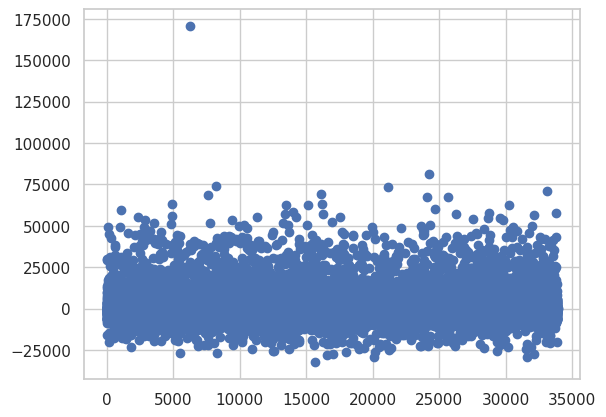

In [ ]:
model_results = eval_models()

In [ ]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,7697.571858,7484.943396,4728.253733,4769.185179,{}
RandomForestRegressor,7082.332816,7006.008974,4331.612333,4451.409914,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,7121.204197,6988.236398,4340.638742,4441.228916,"{'learning_rate': 0.01, 'n_estimators': 710}"
